In [1]:
!pip freeze > requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from agent import Agent
%load_ext autoreload  
%autoreload 2

In [2]:
sample_df1 = pd.read_csv('sample_df1.csv')
sample_df2 = pd.read_csv('sample_df2.csv')

In [ ]:
API_KEY = "api_key"

In [ ]:
import time

In [ ]:
responses_1 = []
query_1 = """Как, на Ваш взгляд, будут меняться цены на основные потребительские товары и услуги в ближайшие один-два месяца? СНАЧАЛА ПОДУМАЙ, а после - оцени общий рост цен по всем категориям товаров у тебя в городе числом от 0 до 5, где:
«Серьезно вырастут» - 5
«Незначительно вырастут» - 4
«Останутся на нынешнем уровне» - 3
«Незначительно снизятся» - 2
«Серьезно снизятся» - 1
Если ты «затрудняешься ответить», то ответь - 0
К примеру, твой ответ должен выглядеть: «Ответ: «Останутся на нынешнем уровне» - 3»"""

for i in range(len(sample_df1)):
    row_i = sample_df1.iloc[i]
    agent = Agent(api_key=API_KEY, row=row_i, q_num = 1)
    response_1 = agent.process_query(query_1)
    score = agent.extract_inflation_score(response_1)
    responses_1.append((response_1, score))
    time.sleep(35)

Agent.save_responses_to_csv(responses_1, 'inflation_responses_1.csv')

In [ ]:
responses_2 = []
query_2 = """Как бы Вы оценили рост цен (инфляцию) в течение последнего месяца-двух? Подумай и оцени рост цен числом по шкале от 0 до 3, где:
«Инфляция очень высокая» - 3
«Инфляция умеренная» - 2  
«Инфляция незначительная» - 1
Если ты «затрудняешься ответить», то ответь - 0
К примеру, твой ответ должен выглядеть так: «Ответ: «Инфляция незначительная» - 1»"""

for i in range(len(sample_df2)):
    row_i = sample_df2.iloc[i]
    agent = Agent(api_key=API_KEY, row=row_i, q_num = 2)
    response_2 = agent.process_query(query_2)
    score = agent.extract_inflation_score(response_2)
    responses_2.append((response_2, score))
    time.sleep(35)

Agent.save_responses_to_csv(responses_2, 'inflation_responses_2.csv')

In [ ]:
df1_results = pd.read_csv('inflation_responses_1.csv')
df2_results = pd.read_csv('inflation_responses_2.csv')

In [56]:
results_1 = {'Серьезно вырастут': [28,0], 
    'Незначительно вырастут': [51,np.round(299/301*100)],
    'Останутся на нынешнем уровне':[10,np.round(3/301*100)],
    'Незначительно снизятся':[2,0],
    'Серьезно снизятся':[1,0],
    'Затрудняюсь ответить':[7,0]}
results_1 = pd.DataFrame(data=results_1,dtype=np.float64)
results_1

,Серьезно вырастут,Незначительно вырастут,Останутся на нынешнем уровне,Незначительно снизятся,Серьезно снизятся,Затрудняюсь ответить
0,28.0,51.0,10.0,2.0,1.0,7.0
1,0.0,99.0,1.0,0.0,0.0,0.0


In [57]:
results_2 = {'Инфляция очень высокая': [41,np.round(60/301*100)], 
    'Инфляция умеренная': [33,np.round(242/301*100)],
    'Инфляция незначительная':[14,0],
    'Затрудняюсь ответить':[12,0]}
results_2 = pd.DataFrame(data=results_2,dtype=np.float64)
results_2

,Инфляция очень высокая,Инфляция умеренная,Инфляция незначительная,Затрудняюсь ответить
0,41.0,33.0,14.0,12.0
1,20.0,80.0,0.0,0.0


In [3]:
import matplotlib.pyplot as plt

def plot_four_bars(results_1, results_2):
    fig, axs = plt.subplots(2, 2, figsize=(25, 20))
    bar_width = 0.6

    # Первый график: results_1, строка 0 (ВЦИОМ)
    axs[0,0].bar(results_1.columns, results_1.iloc[0], color='skyblue', width=bar_width)
    axs[0,0].set_title('Инфляционные ожидания (ВЦИОМ)')
    axs[0,0].set_ylabel('%')
    axs[0,0].set_xticklabels(results_1.columns, rotation=20, ha='right')
    for i, v in enumerate(results_1.iloc[0]):
        axs[0,0].text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

    # Второй график: results_1, строка 1 (Моделирование)
    axs[0,1].bar(results_1.columns, results_1.iloc[1], color='lightgreen', width=bar_width)
    axs[0,1].set_title('Инфляционные ожидания (LLM-агенты)')
    axs[0,1].set_ylabel('%')
    axs[0,1].set_xticklabels(results_1.columns, rotation=20, ha='right')
    for i, v in enumerate(results_1.iloc[1]):
        axs[0,1].text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

    # Третий график: results_2, строка 0 (ВЦИОМ)
    axs[1,0].bar(results_2.columns, results_2.iloc[0], color='salmon', width=bar_width)
    axs[1,0].set_title('Оценка темпов инфляции последних месяцев (ВЦИОМ)')
    axs[1,0].set_ylabel('%')
    axs[1,0].set_xticklabels(results_2.columns, rotation=20, ha='right')
    for i, v in enumerate(results_2.iloc[0]):
        axs[1,0].text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

    # Четвертый график: results_2, строка 1 (Моделирование)
    axs[1,1].bar(results_2.columns, results_2.iloc[1], color='gold', width=bar_width)
    axs[1,1].set_title('Оценка темпов инфляции последних месяцев  (LLM-агенты)')
    axs[1,1].set_ylabel('%')
    axs[1,1].set_xticklabels(results_2.columns, rotation=20, ha='right')
    for i, v in enumerate(results_2.iloc[1]):
        axs[1,1].text(i, v + 1, f'{v:.0f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


/var/folders/mv/b4_lpxs17z1d9qycp4w_lx780000gn/T/ipykernel_846/2422657001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(results_1.columns, rotation=20, ha='right')
/var/folders/mv/b4_lpxs17z1d9qycp4w_lx780000gn/T/ipykernel_846/2422657001.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(results_1.columns, rotation=20, ha='right')
/var/folders/mv/b4_lpxs17z1d9qycp4w_lx780000gn/T/ipykernel_846/2422657001.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(results_2.columns, rotation=20, ha='right')
/var/folders/mv/b4_lpxs17z1d9qycp4w_lx780000gn/T/ipykernel_846/2422657001.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

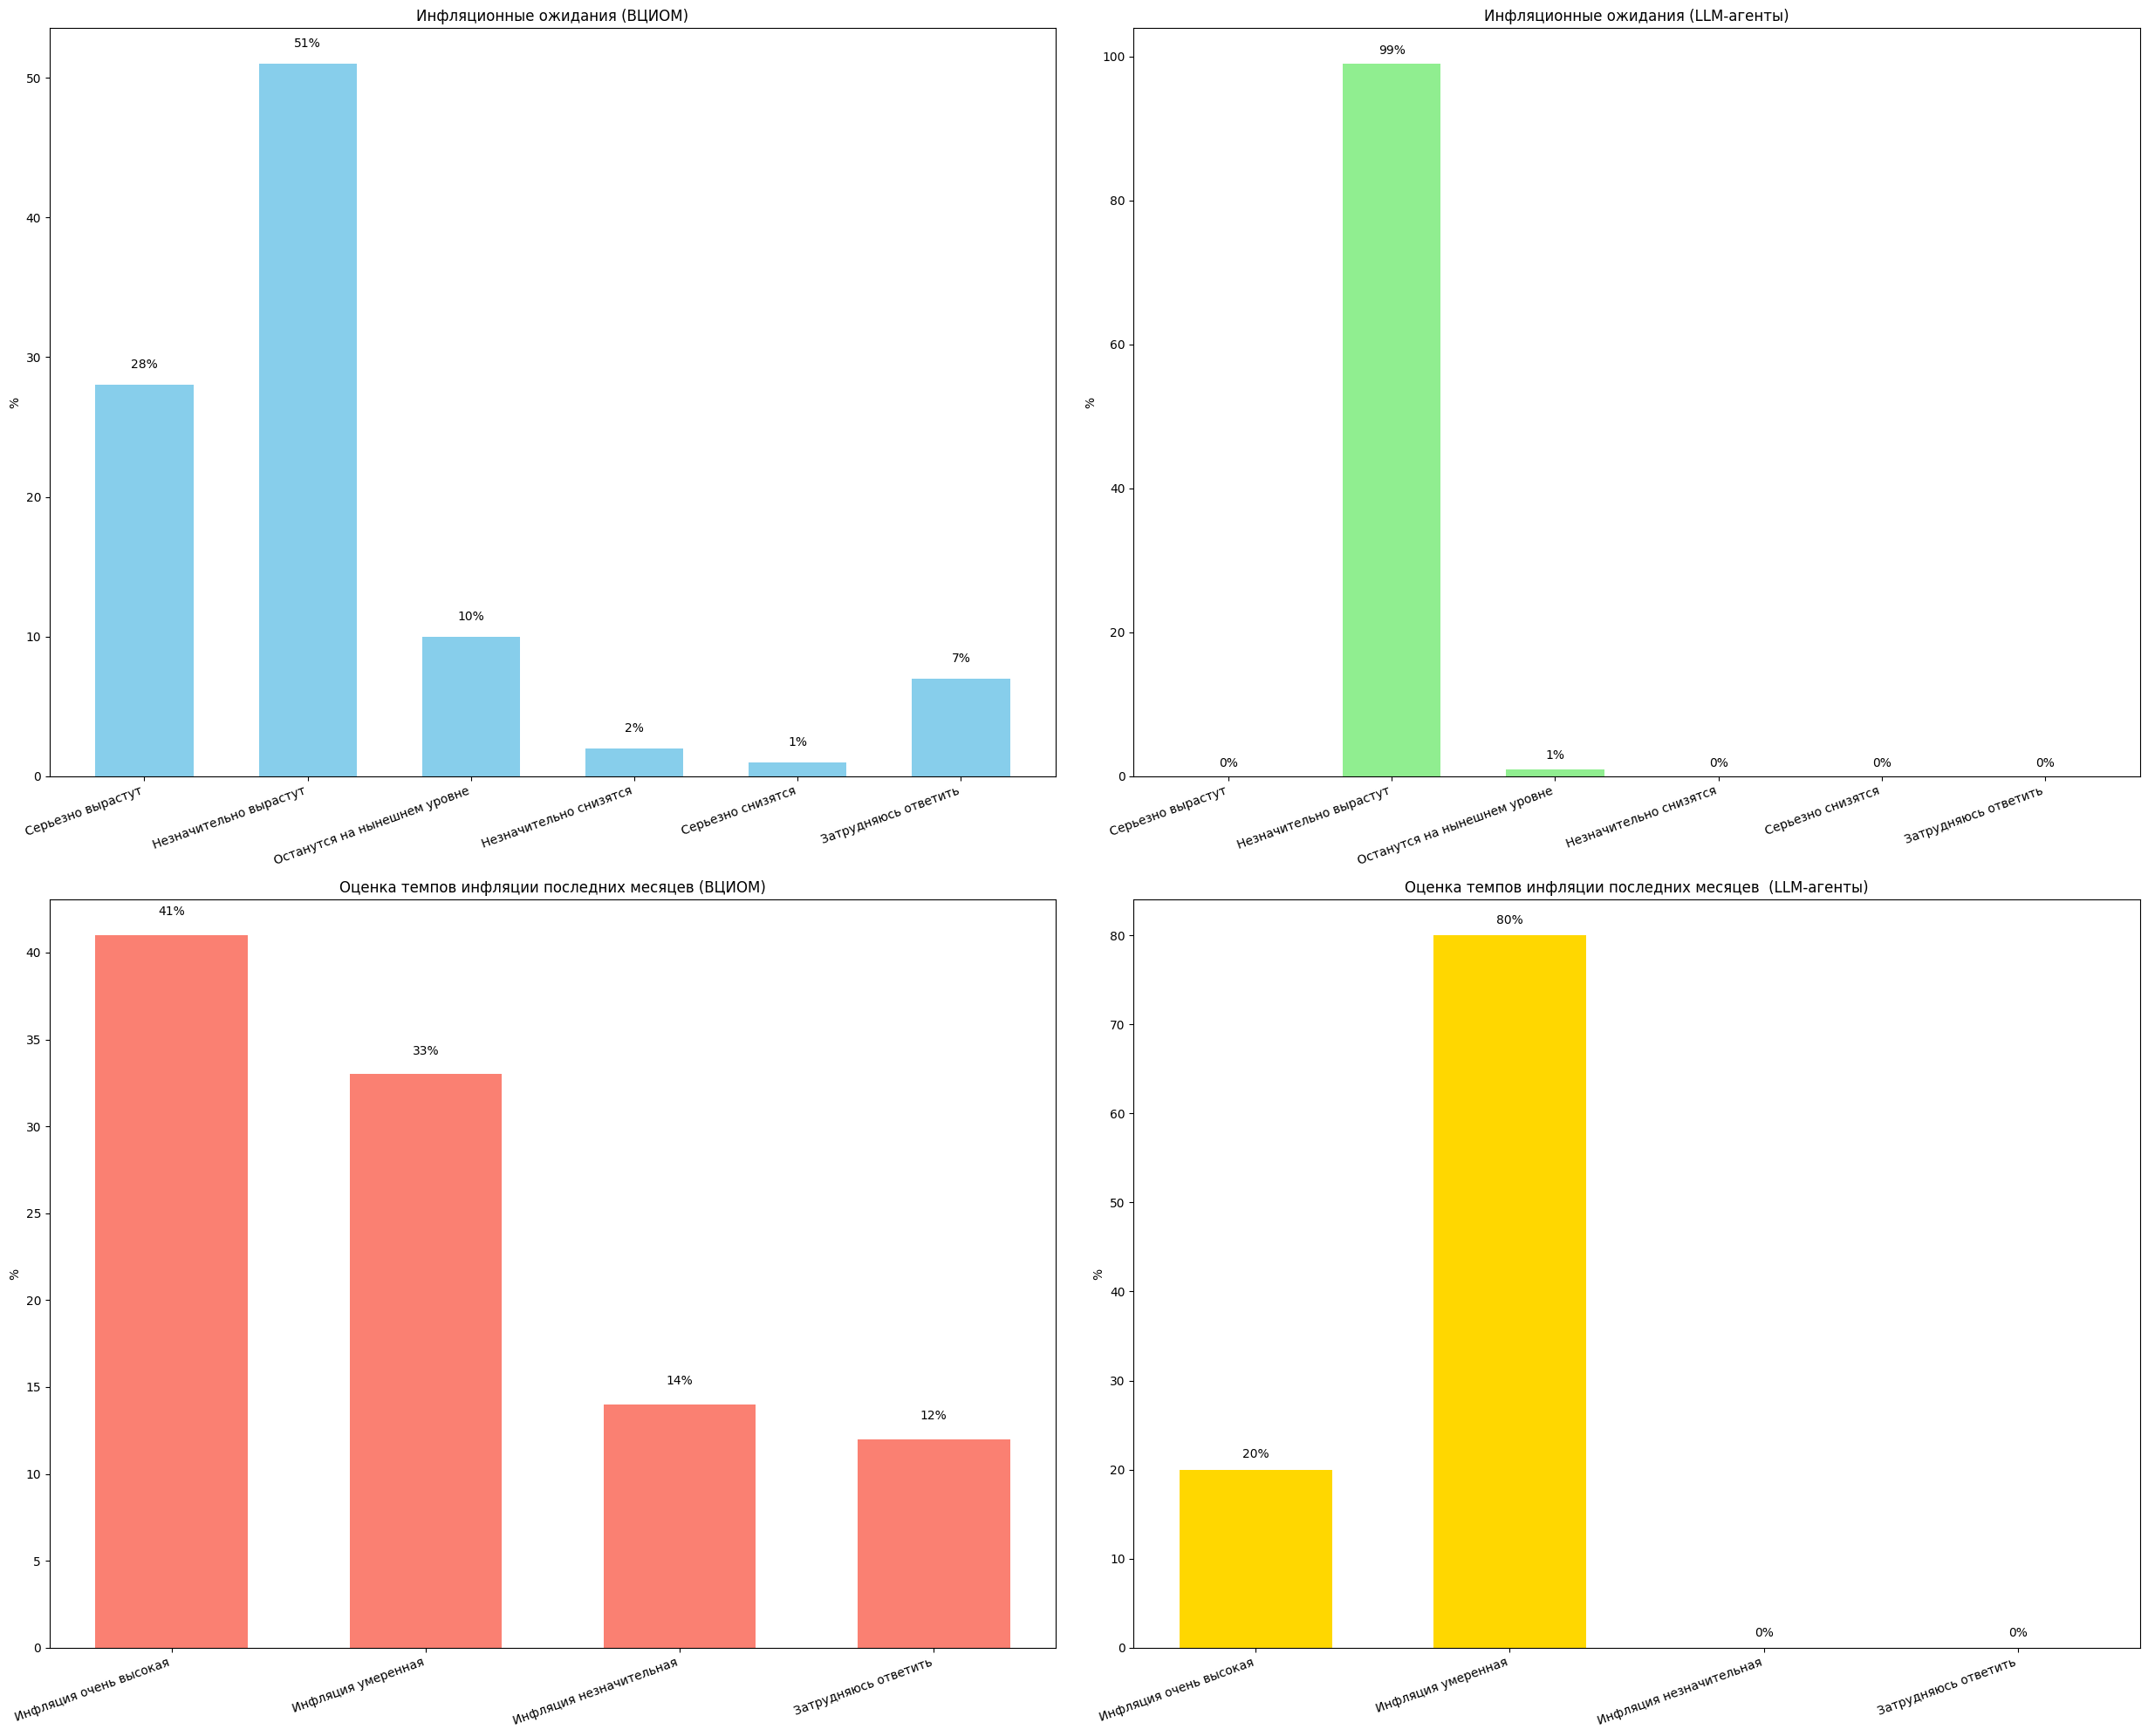

In [65]:
plot_four_bars(results_1, results_2)
